<a href="https://colab.research.google.com/github/anparashar/Fundus-disease-classification-feature-fusion/blob/main/Fundus_feature_optimization_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Wrapper feature selection toolbox is used for optimizing
import os
os.chdir('/content')
CODE_DIR = 'Wrapper-Feature-Selection-Toolbox-Python'
!git clone https://github.com/anparashar/Wrapper-Feature-Selection-Toolbox-Python.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')

Cloning into 'Wrapper-Feature-Selection-Toolbox-Python'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 163 (delta 38), reused 59 (delta 36), pack-reused 102 (from 1)
Receiving objects: 100% (163/163), 81.51 KiB | 1.20 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [ ]:
# combining of features

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from FS.fa import jfs   # change this to switch algorithm
#from FS.ga import jfs
#from FS.gwo import jfs
#from FS.de import jfs
#from FS.pso import jfs
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

# load data
data1  = pd.read_csv('/content/drive/MyDrive/googlenet_feature_RFMiD.csv')
data2= pd.read_csv('/content/drive/MyDrive/resnet_feature_RFMiD.csv')
data=np.append(data1, data2, axis=1)
#data  = data.values
#print(data)
#print(len(data))



la1=pd.read_csv('/content/drive/MyDrive/googlenet_label_RFMiD.csv')
la2=pd.read_csv('/content/drive/MyDrive/resnet_label_RFMiD.csv')
la=np.append(la1, la2, axis=1)
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(la[:, -1])

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 50   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
#opts1 = {'k':k, 'fold':fold1, 'N':N, 'T':T}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']




Generation: 1
Best (FA): 0.0073187263827789156
Generation: 2
Best (FA): 0.007292701659291603
Generation: 3
Best (FA): 0.0064406343310913165
Generation: 4
Best (FA): 0.0064406343310913165
Generation: 5
Best (FA): 0.0064406343310913165
Generation: 6
Best (FA): 0.0064406343310913165
Generation: 7
Best (FA): 0.0064406343310913165
Generation: 8
Best (FA): 0.0064406343310913165
Generation: 9
Best (FA): 0.006401597245860346
Generation: 10
Best (FA): 0.006401597245860346
Generation: 11
Best (FA): 0.006401597245860346
Generation: 12
Best (FA): 0.006401597245860346
Generation: 13
Best (FA): 0.006401597245860346
Generation: 14
Best (FA): 0.006401597245860346
Generation: 15
Best (FA): 0.006401597245860346
Generation: 16
Best (FA): 0.006401597245860346
Generation: 17
Best (FA): 0.006401597245860346
Generation: 18
Best (FA): 0.006401597245860346
Generation: 19
Best (FA): 0.006401597245860346
Generation: 20
Best (FA): 0.006401597245860346
Generation: 21
Best (FA): 0.006401597245860346
Generation: 22


KNN Accuracy: 100.0
KNN Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00       177
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00       162
           8       1.00      1.00      1.00       101
           9       1.00      1.00      1.00       233

    accuracy                           1.00      1208
   macro avg       1.00      1.00      1.00      1208
weighted avg       1.00      1.00      1.00      1208

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
Cohens kappa: 1.000000


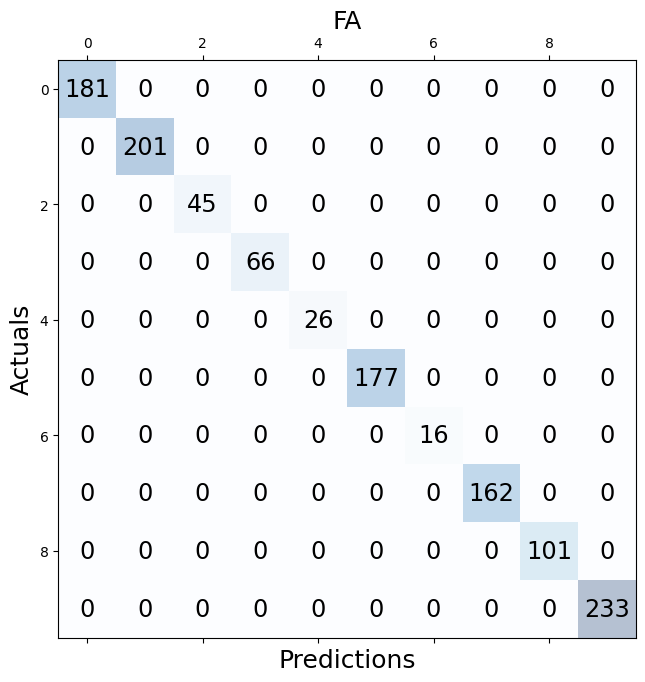

AUC
1.25
Sensitivity
1.0
Specificity
1.0


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.preprocessing import label_binarize
import sklearn

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug
mdl       = KNeighborsClassifier(n_neighbors = k)
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
print("KNN Accuracy:", 100 * Acc)
# classification report
print("KNN Classification Report")
print(classification_report(y_valid, y_pred))
#print(mdl.score (x_valid, y_valid))

####
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_valid, y_pred,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_valid, y_pred,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_valid, y_pred, average='micro')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_valid, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC

cm = confusion_matrix(y_valid, y_pred)
#print(cm)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('FA', fontsize=18)
plt.show()


def roc_auc_score_multiclass(y_valid, y_pred, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_valid)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in y_valid]
    new_pred_class = [0 if x in other_class else 1 for x in y_pred]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

lr_roc_auc_multiclass = roc_auc_score_multiclass(y_valid, y_pred)
#print(lr_roc_auc_multiclass)

auc=sum(lr_roc_auc_multiclass.values())/8
print('AUC')
print(auc)


sensitivity = recall_score(y_valid, y_pred, average='micro')
print("Sensitivity")
print(sensitivity)
specificity = recall_score(np.logical_not(y_valid) , np.logical_not(y_pred))

print("Specificity")
print(specificity)
